<a href="https://colab.research.google.com/github/anvayg412/Prediction-of-Mohs-Hardness/blob/main/Prediction_of_Mohs_Hardness_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import mutual_info_regression
from sklearn.preprocessing import StandardScaler
from catboost import CatBoostRegressor, Pool
import catboost as cb
from sklearn.model_selection import KFold
from sklearn.metrics import median_absolute_error
from sklearn.model_selection import train_test_split
import io
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


In [218]:
from google.colab import files

uploaded = files.upload()

Saving train.csv to train.csv
Saving test.csv to test.csv


In [221]:
uploaded = files.upload()

Saving Artificial_Crystals_Dataset.csv to Artificial_Crystals_Dataset.csv
Saving Mineral_Dataset_Supplementary_Info.csv to Mineral_Dataset_Supplementary_Info.csv


In [219]:
train = pd.read_csv(io.BytesIO(uploaded['train.csv']))
test = pd.read_csv(io.BytesIO(uploaded['test.csv']))

In [222]:
mineral = pd.read_csv(io.BytesIO(uploaded['Mineral_Dataset_Supplementary_Info.csv']))
crystals = pd.read_csv(io.BytesIO(uploaded['Artificial_Crystals_Dataset.csv']))

In [223]:
#train=pd.read_csv(r"C:\Users\anvay\Downloads\train.csv (2)\train.csv")
#test=pd.read_csv(r"C:\Users\anvay\Downloads\train.csv (2)\test.csv")
#mineral = pd.read_csv(r'C:\Users\anvay\Downloads\archive (6)\jm79zfps6b-1\Mineral_Dataset_Supplementary_Info.csv')
#crystals = pd.read_csv(r'C:\Users\anvay\Downloads\archive (6)\jm79zfps6b-1\Artificial_Crystals_Dataset.csv')

In [224]:
train.columns

Index(['id', 'allelectrons_Total', 'density_Total', 'allelectrons_Average',
       'val_e_Average', 'atomicweight_Average', 'ionenergy_Average',
       'el_neg_chi_Average', 'R_vdw_element_Average', 'R_cov_element_Average',
       'zaratio_Average', 'density_Average', 'Hardness'],
      dtype='object')

In [225]:
def null_func(df):
    if df.isnull().sum().any():
        print("Missing values")
    else:
        print("No Missing values")
    print(df.isnull().sum())
null_func(train)
null_func(test)

No Missing values
id                       0
allelectrons_Total       0
density_Total            0
allelectrons_Average     0
val_e_Average            0
atomicweight_Average     0
ionenergy_Average        0
el_neg_chi_Average       0
R_vdw_element_Average    0
R_cov_element_Average    0
zaratio_Average          0
density_Average          0
Hardness                 0
dtype: int64
No Missing values
id                       0
allelectrons_Total       0
density_Total            0
allelectrons_Average     0
val_e_Average            0
atomicweight_Average     0
ionenergy_Average        0
el_neg_chi_Average       0
R_vdw_element_Average    0
R_cov_element_Average    0
zaratio_Average          0
density_Average          0
dtype: int64


In [226]:
train.isnull().sum()

id                       0
allelectrons_Total       0
density_Total            0
allelectrons_Average     0
val_e_Average            0
atomicweight_Average     0
ionenergy_Average        0
el_neg_chi_Average       0
R_vdw_element_Average    0
R_cov_element_Average    0
zaratio_Average          0
density_Average          0
Hardness                 0
dtype: int64

In [227]:
def dupli(df,target):
    dup=df[df[df.columns.difference(['Hardness'])].duplicated()]
    if len(dup)>0:
        df.drop_duplicates(df,inplace=True)
        print("duplicate values dropped")
    else:
        print("no duplicate values")
dupli(train,'Hardness')
dupli(test,'Hardness')

no duplicate values
no duplicate values


In [228]:
train.columns.difference(['Hardness'])

Index(['R_cov_element_Average', 'R_vdw_element_Average',
       'allelectrons_Average', 'allelectrons_Total', 'atomicweight_Average',
       'density_Average', 'density_Total', 'el_neg_chi_Average', 'id',
       'ionenergy_Average', 'val_e_Average', 'zaratio_Average'],
      dtype='object')

<Figure size 640x480 with 0 Axes>

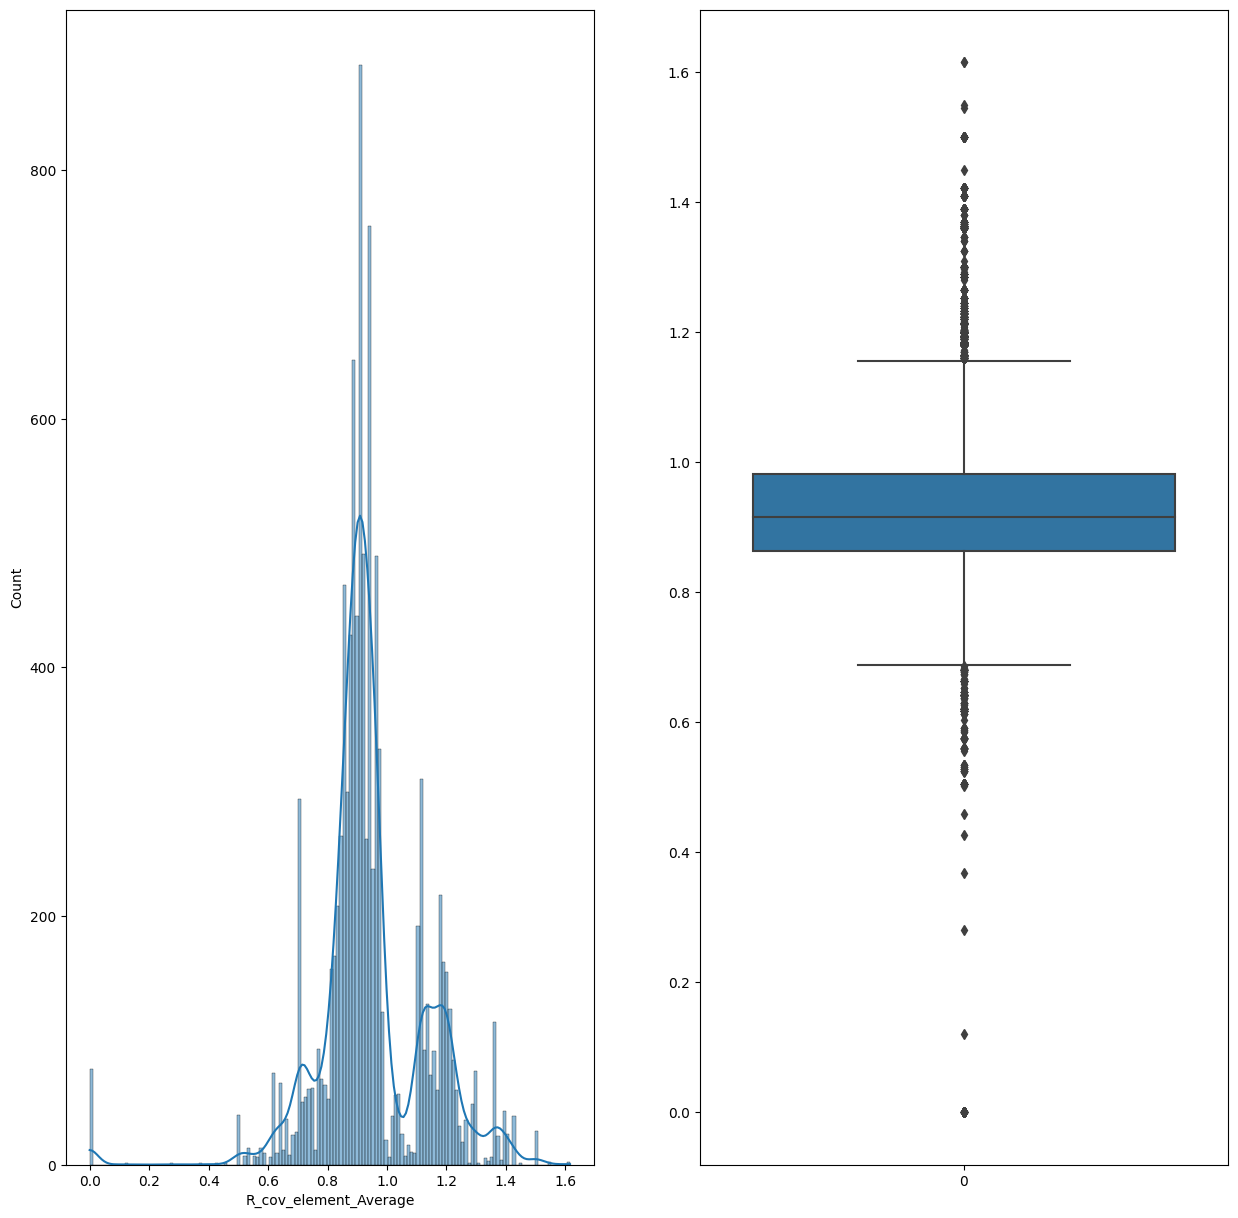

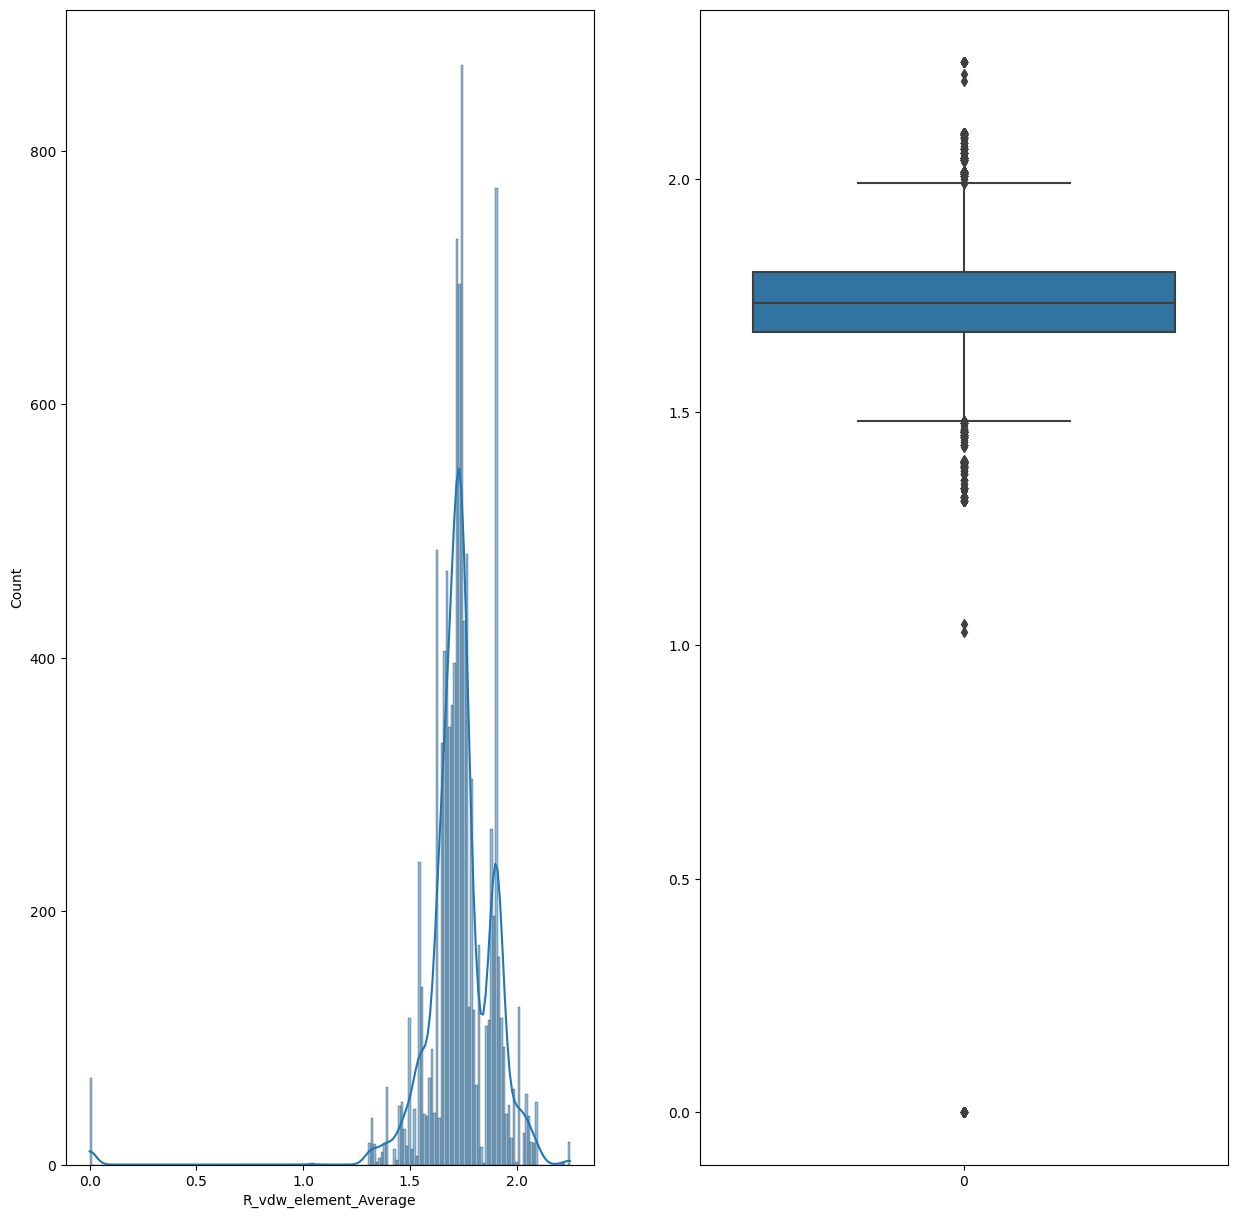

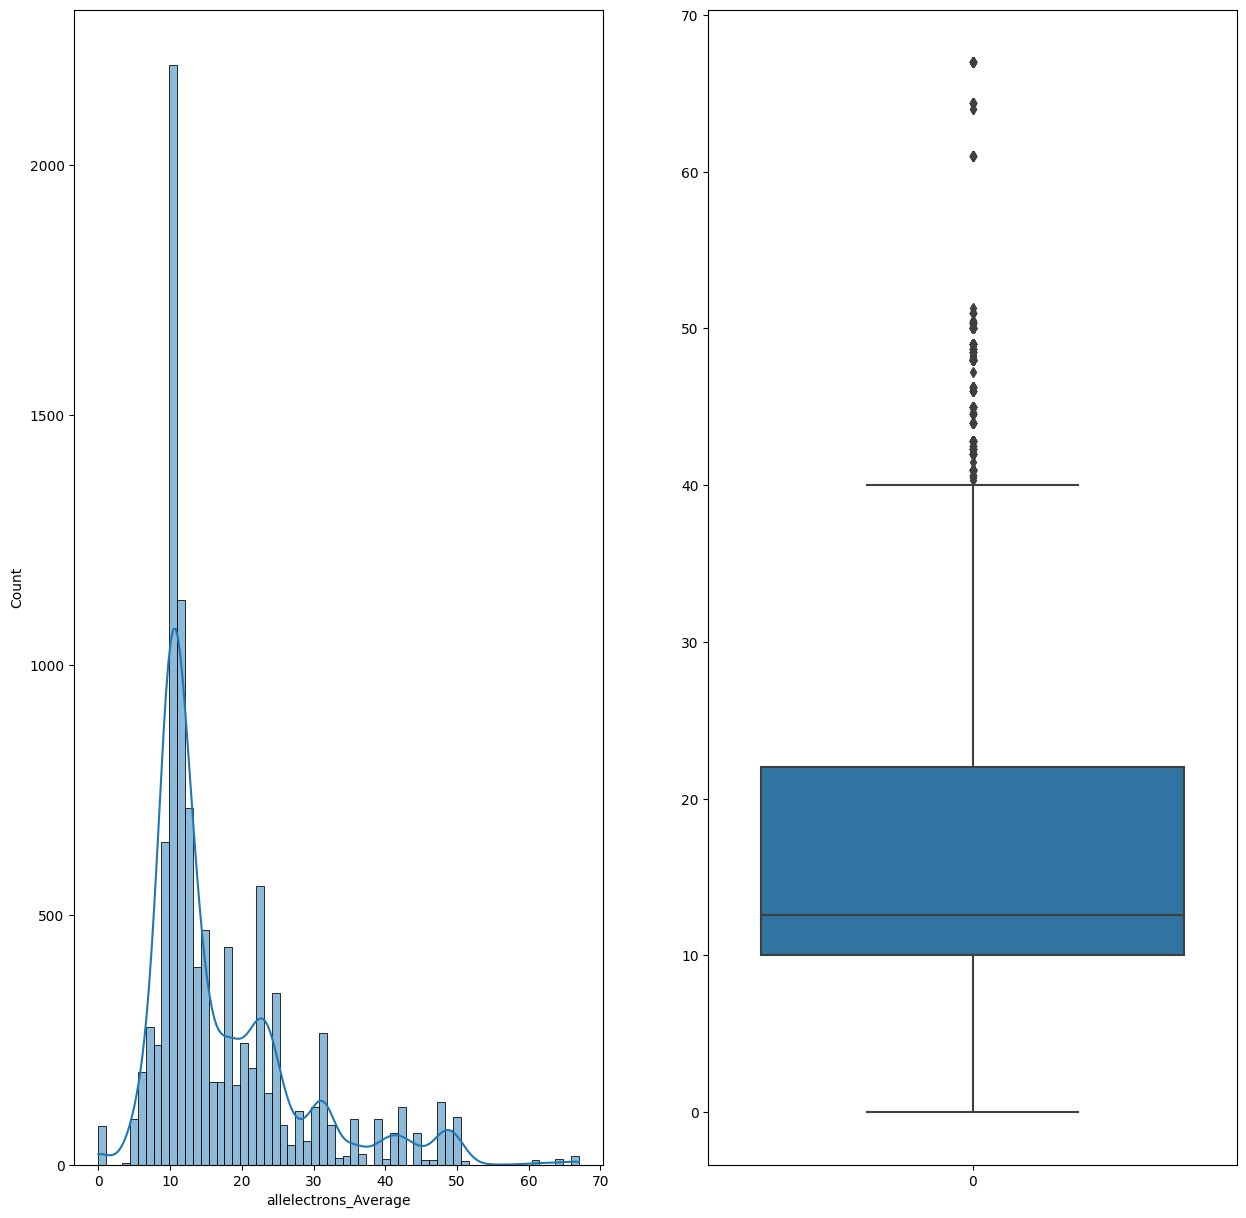

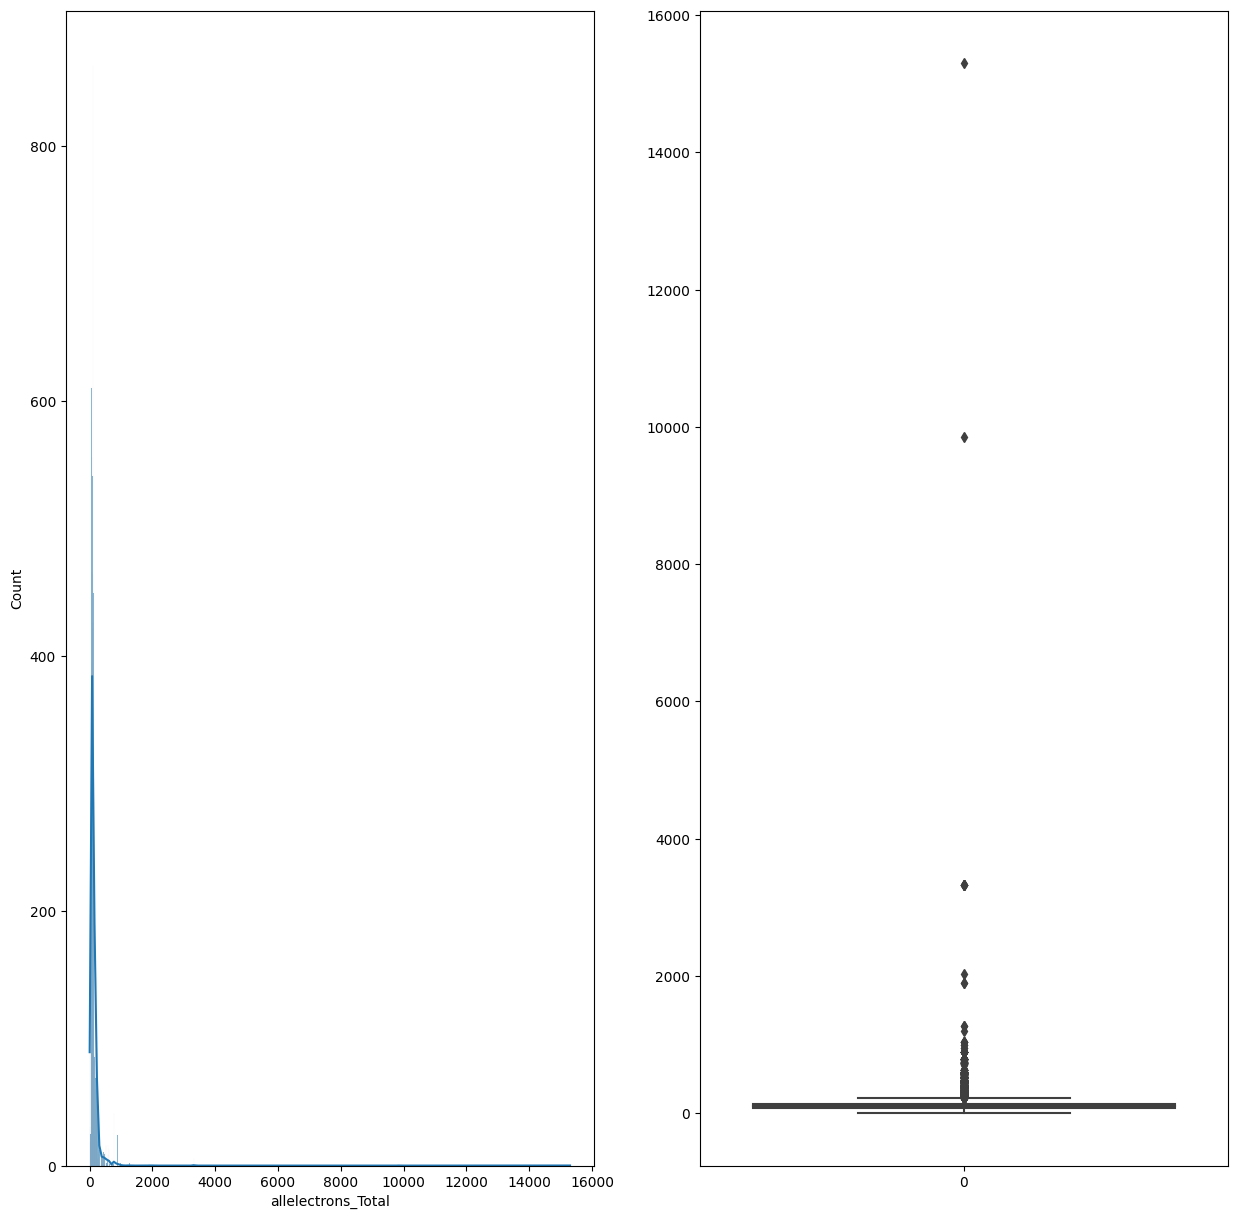

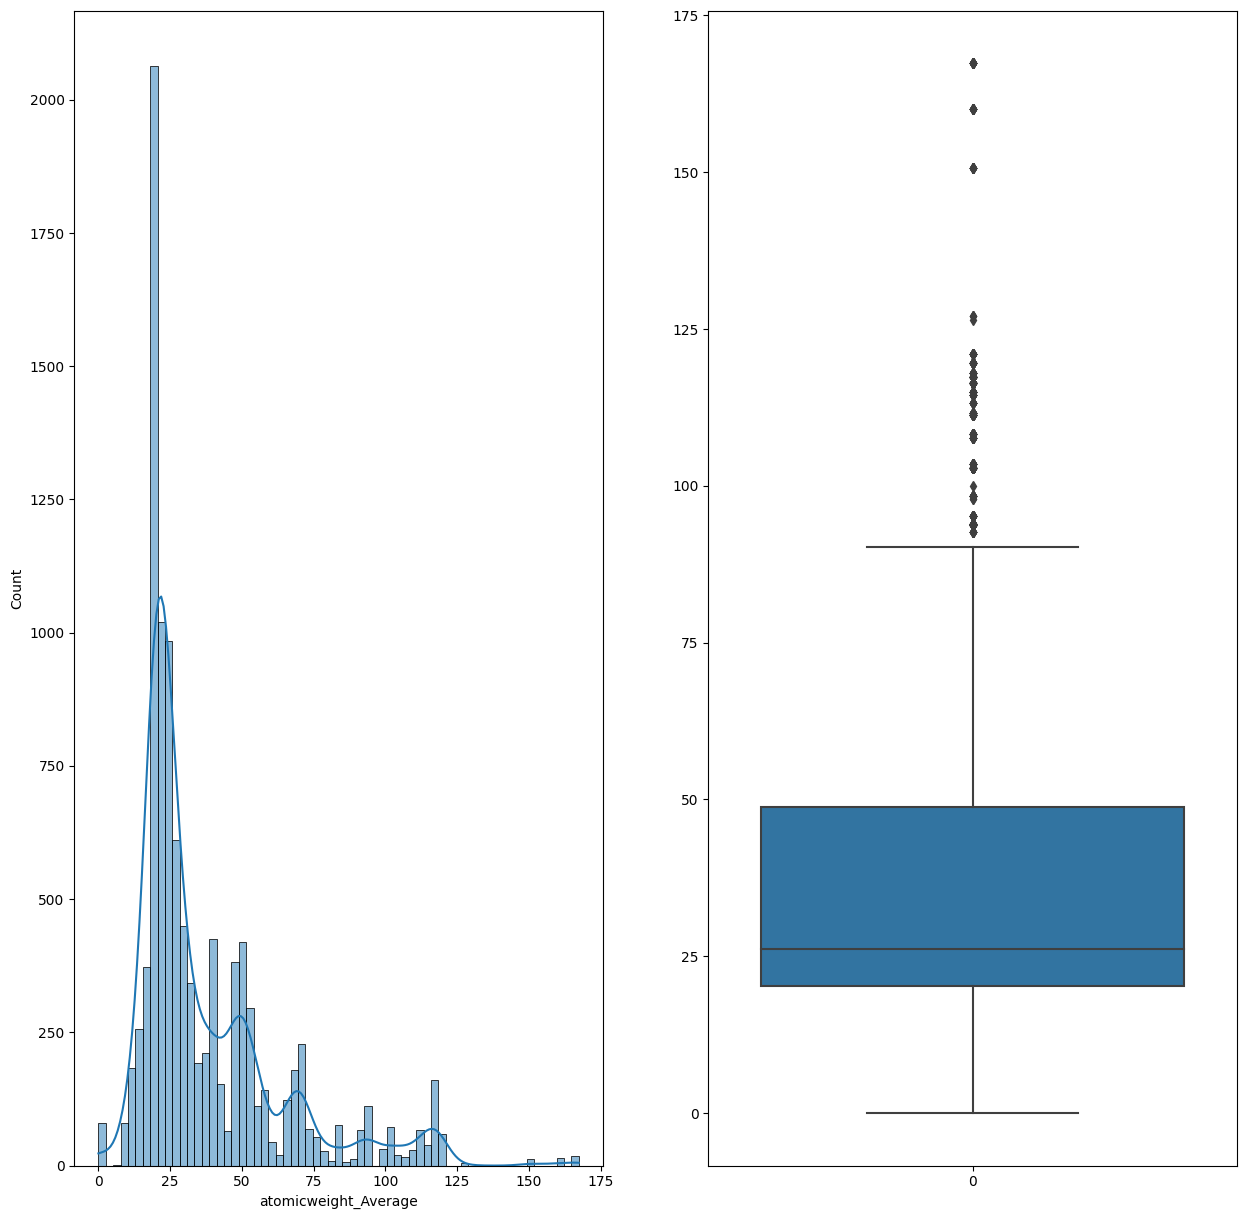

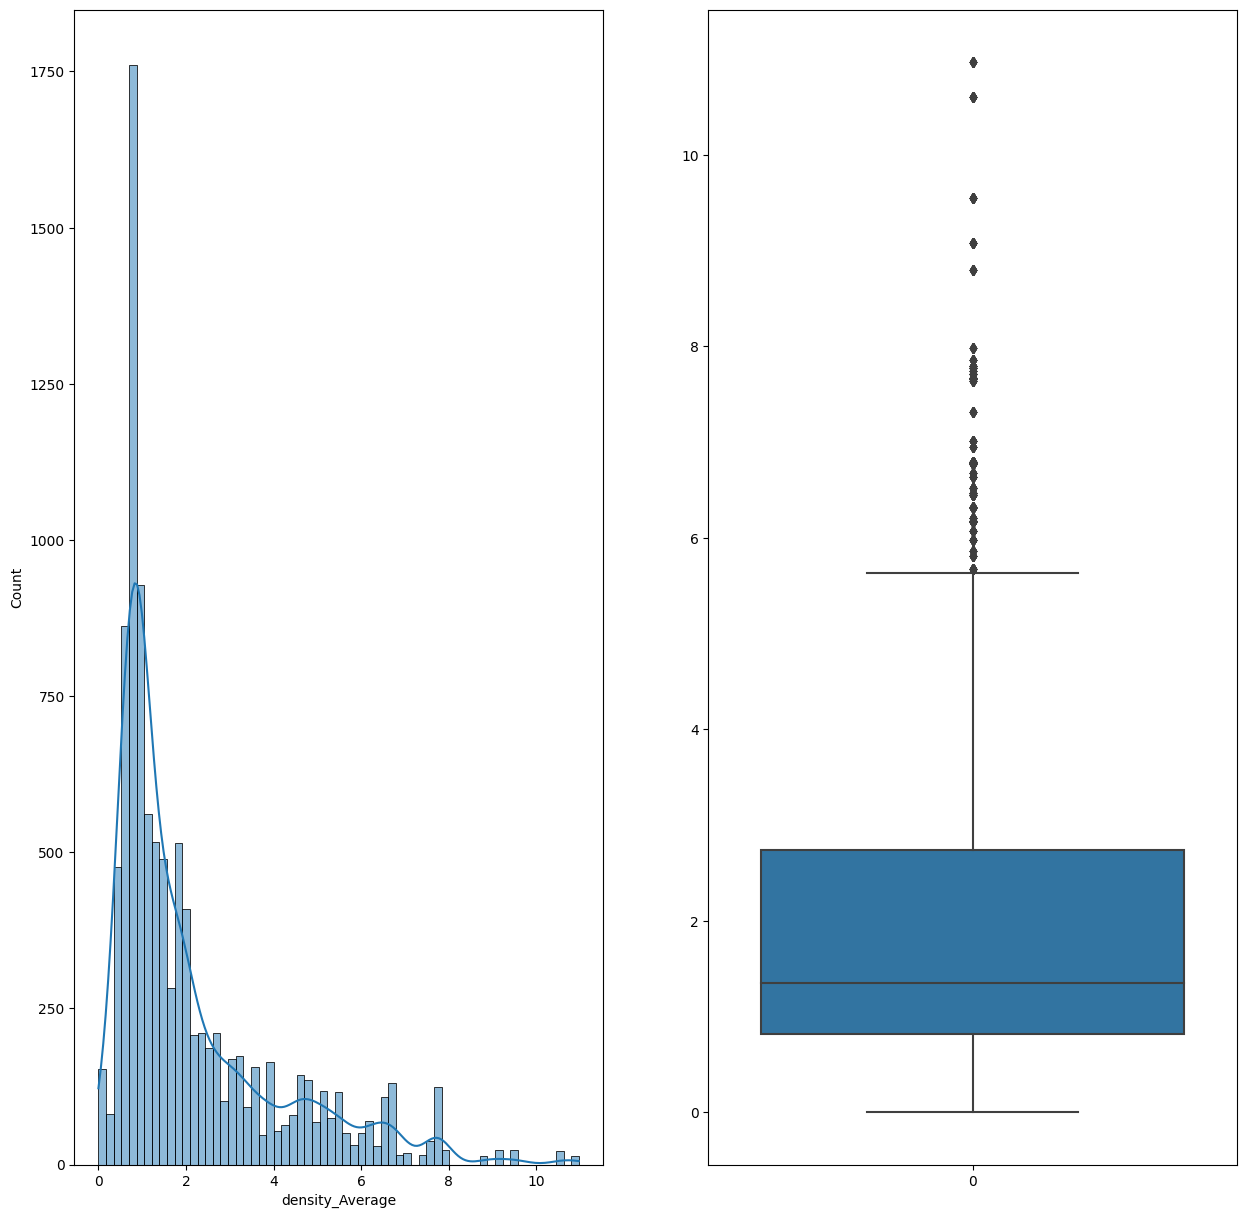

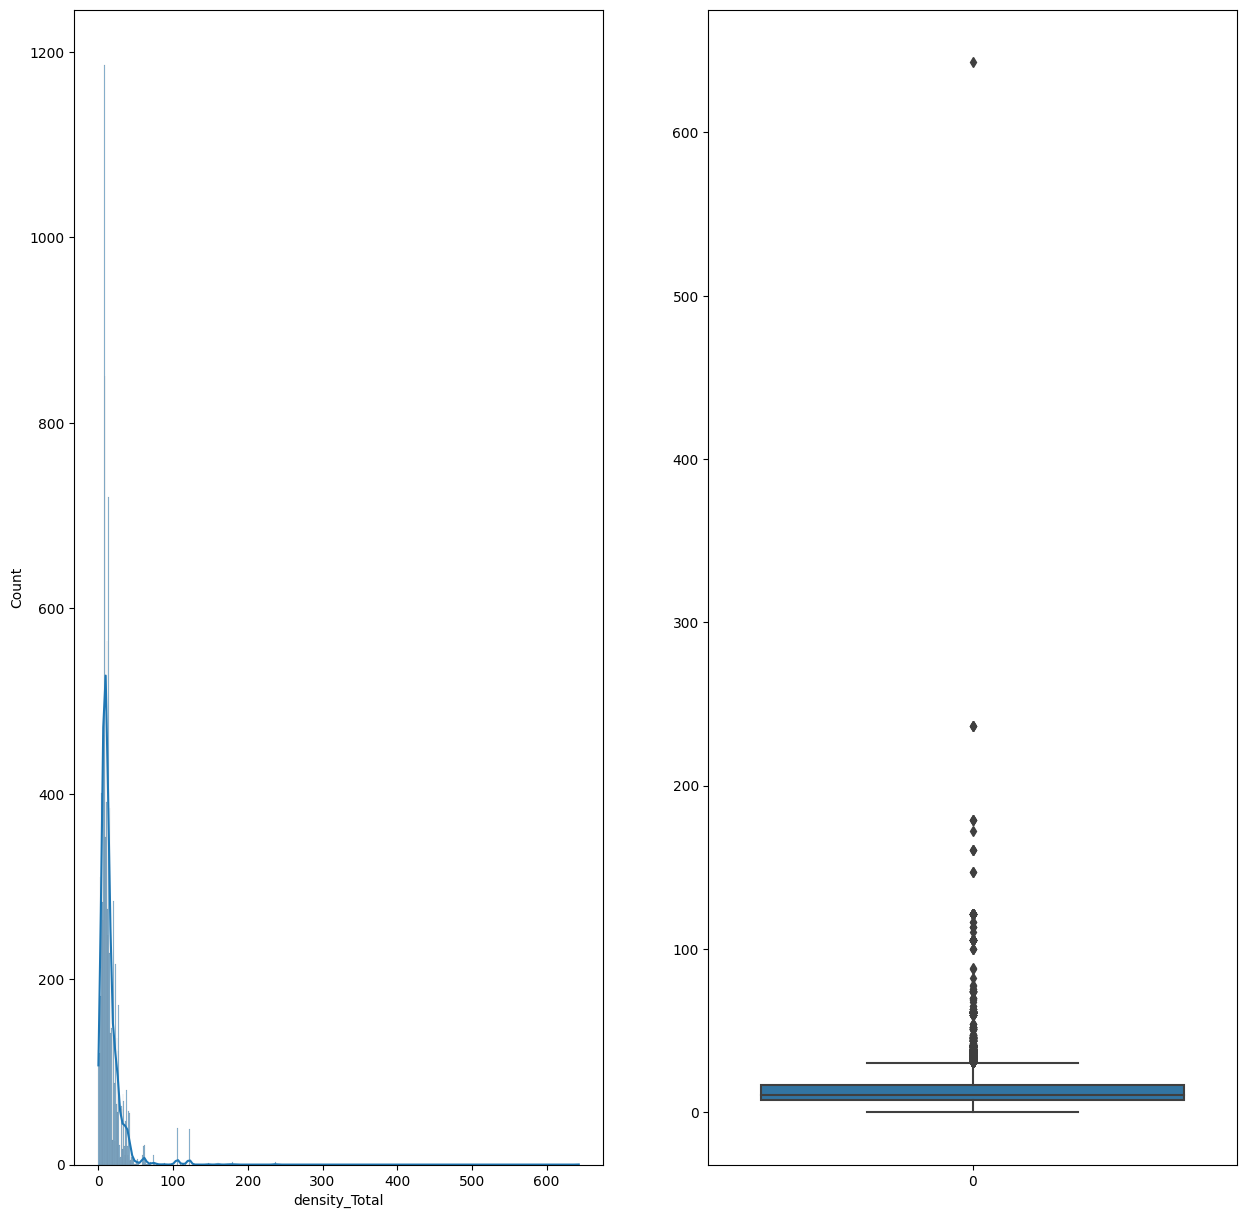

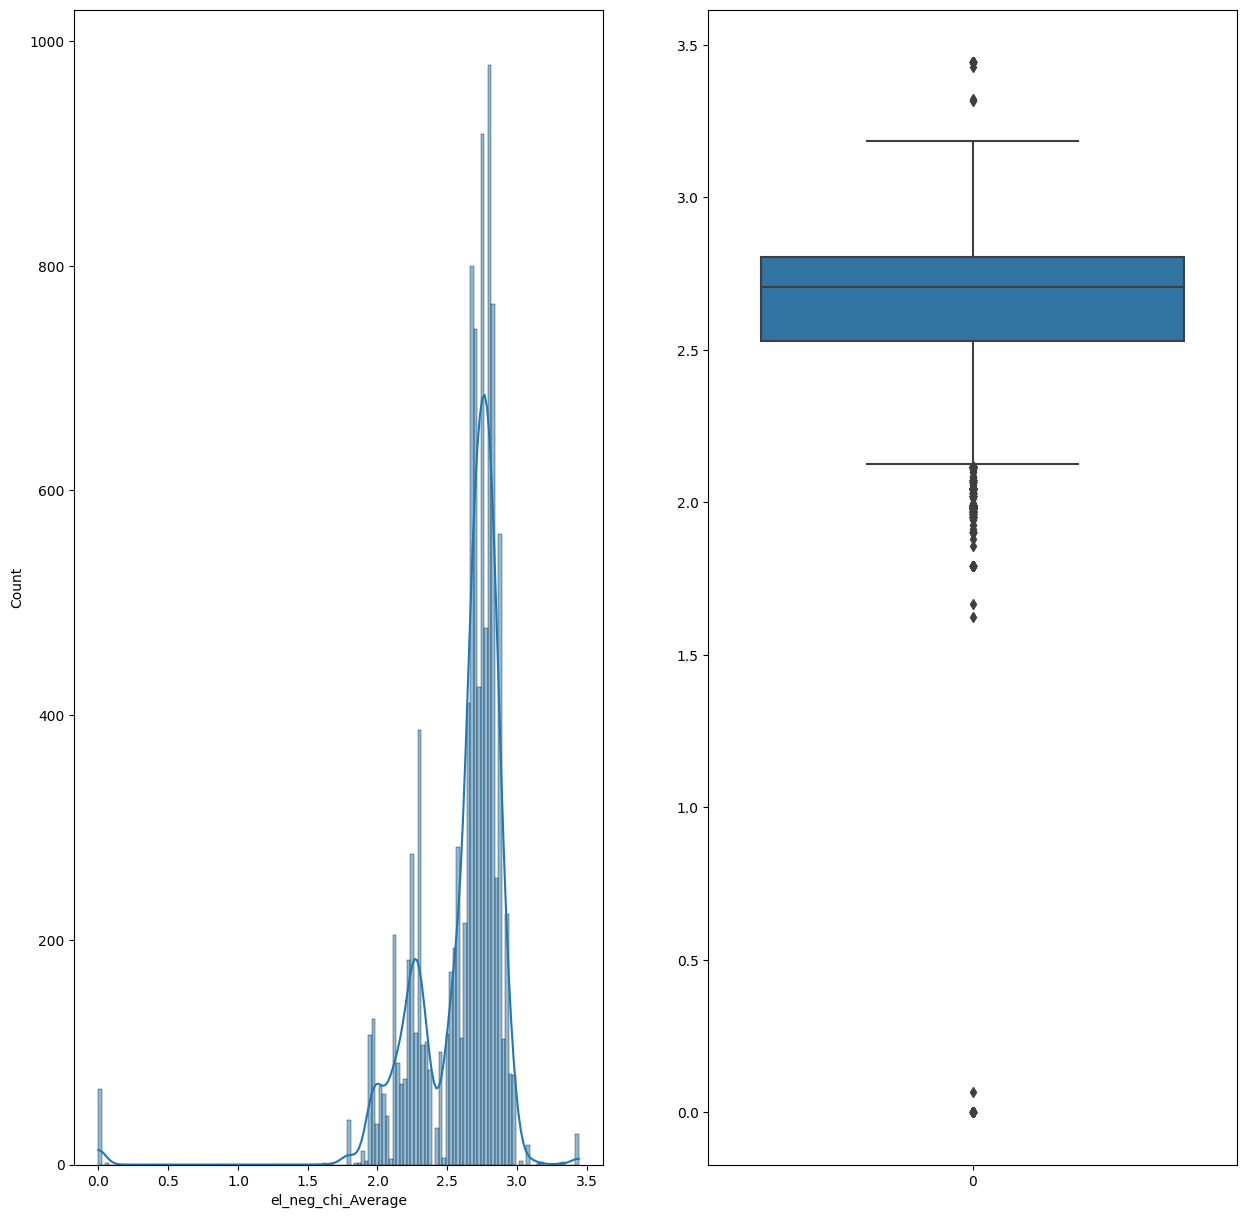

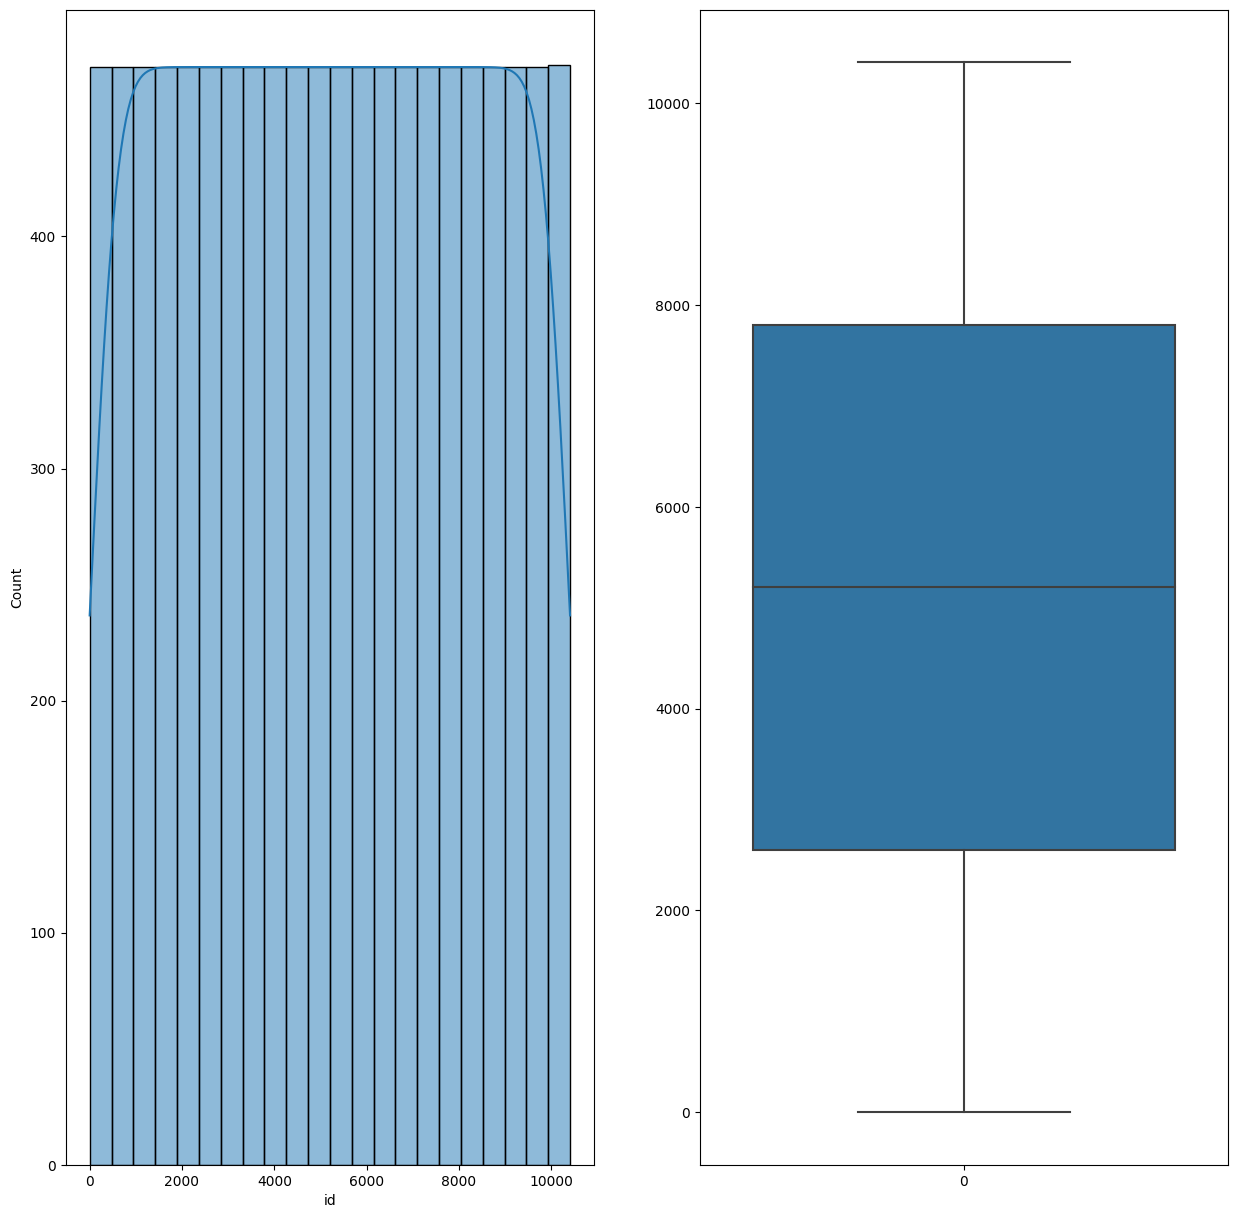

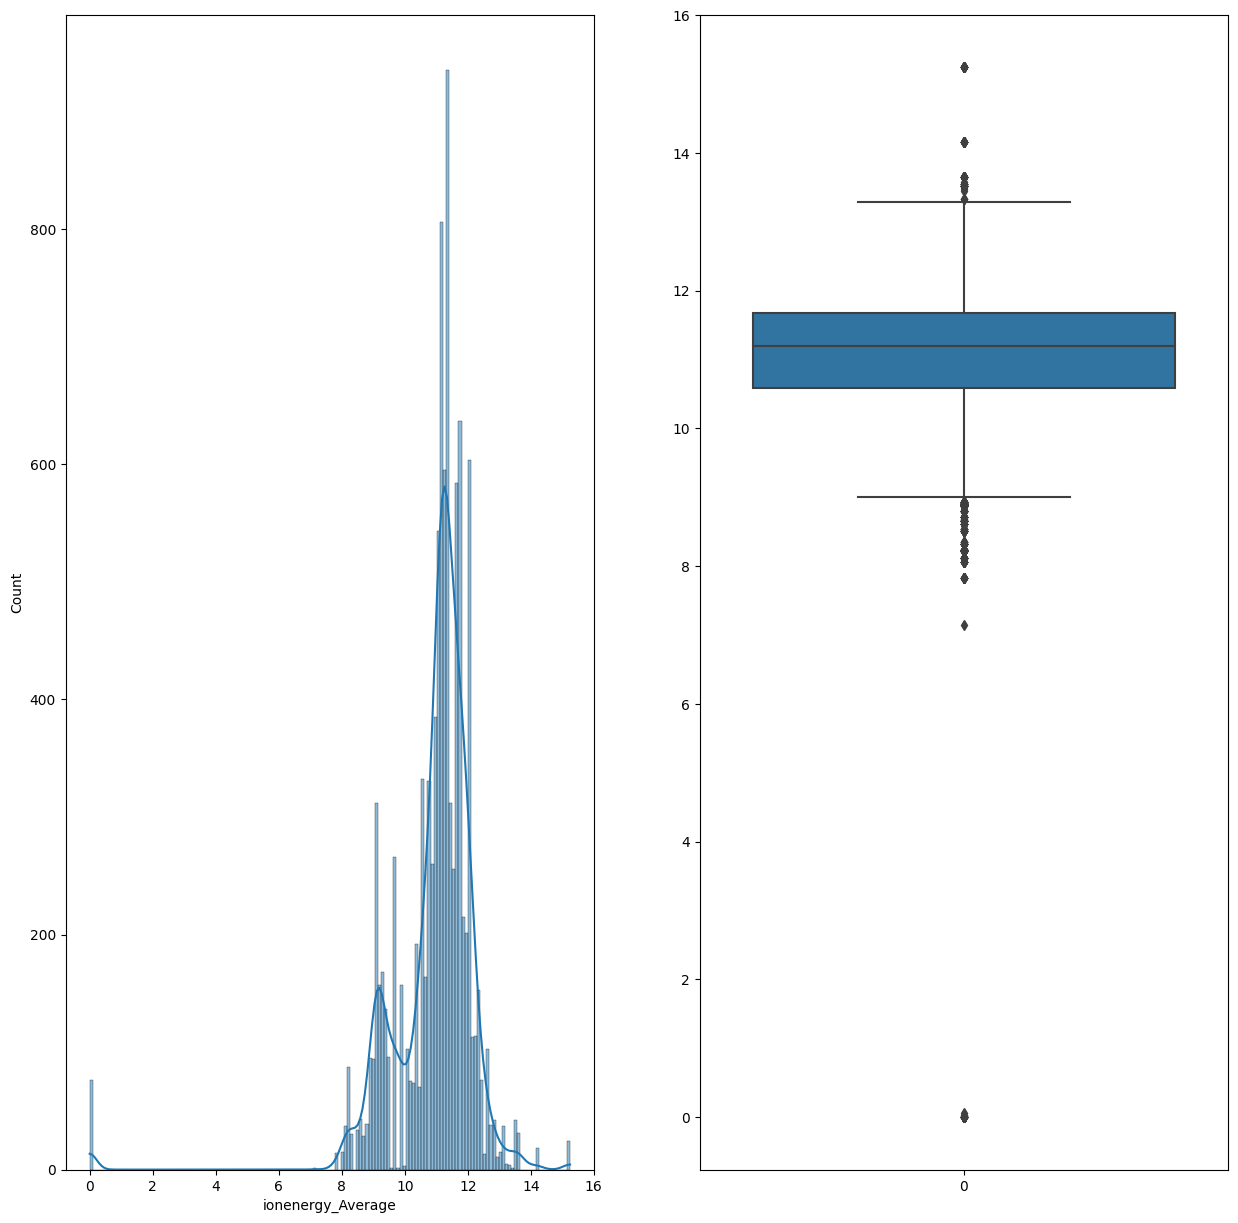

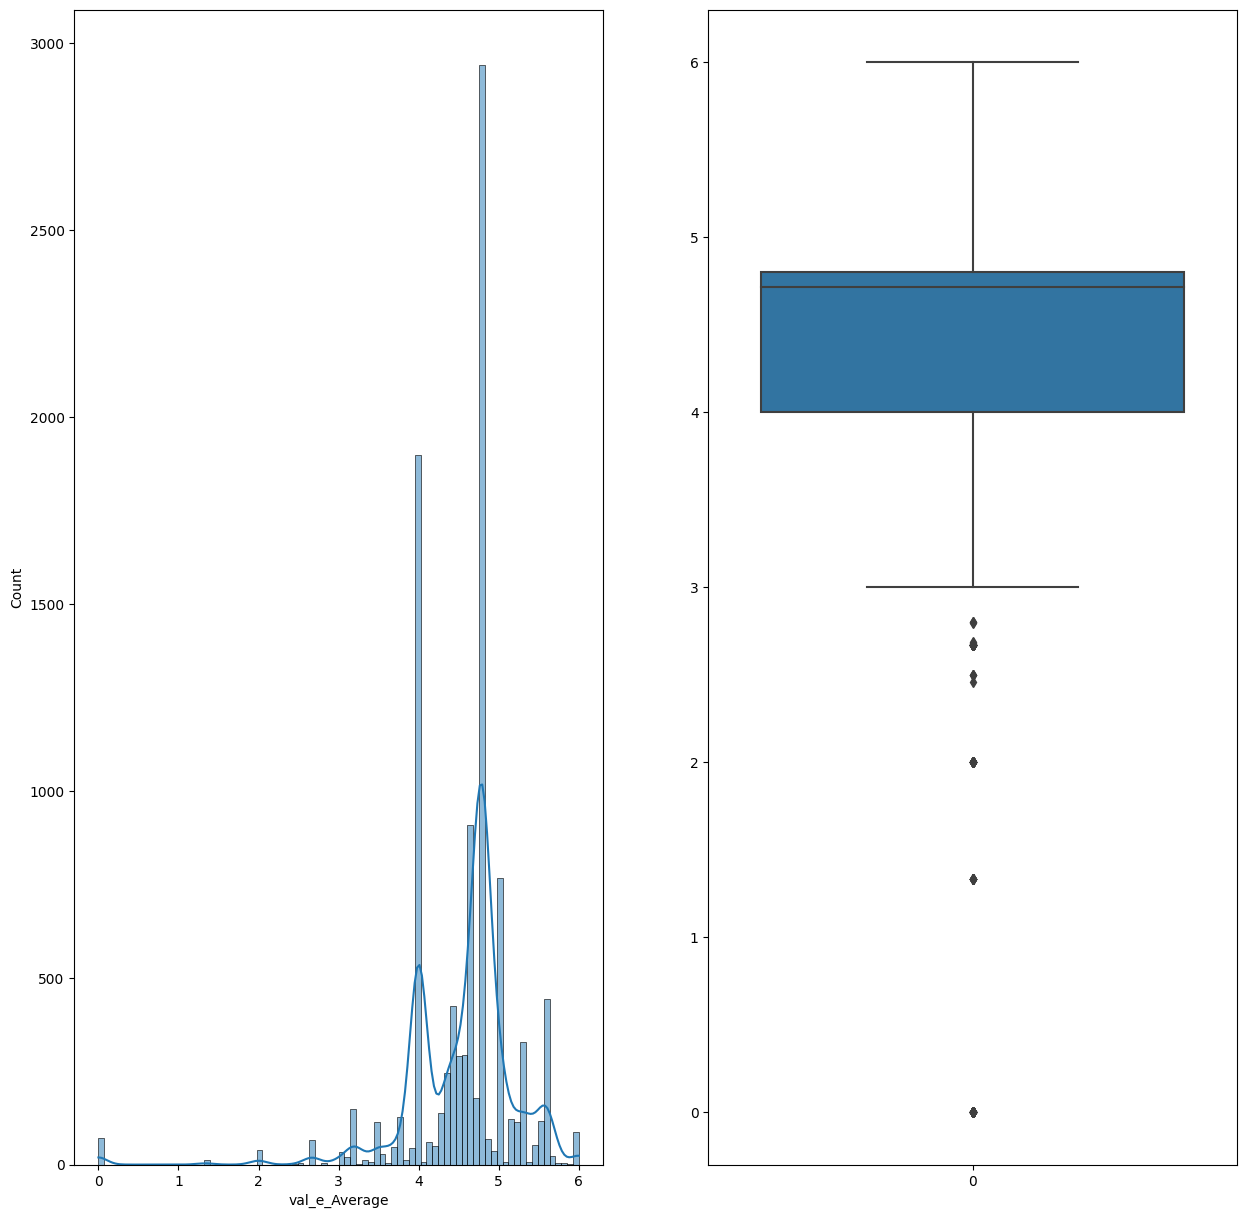

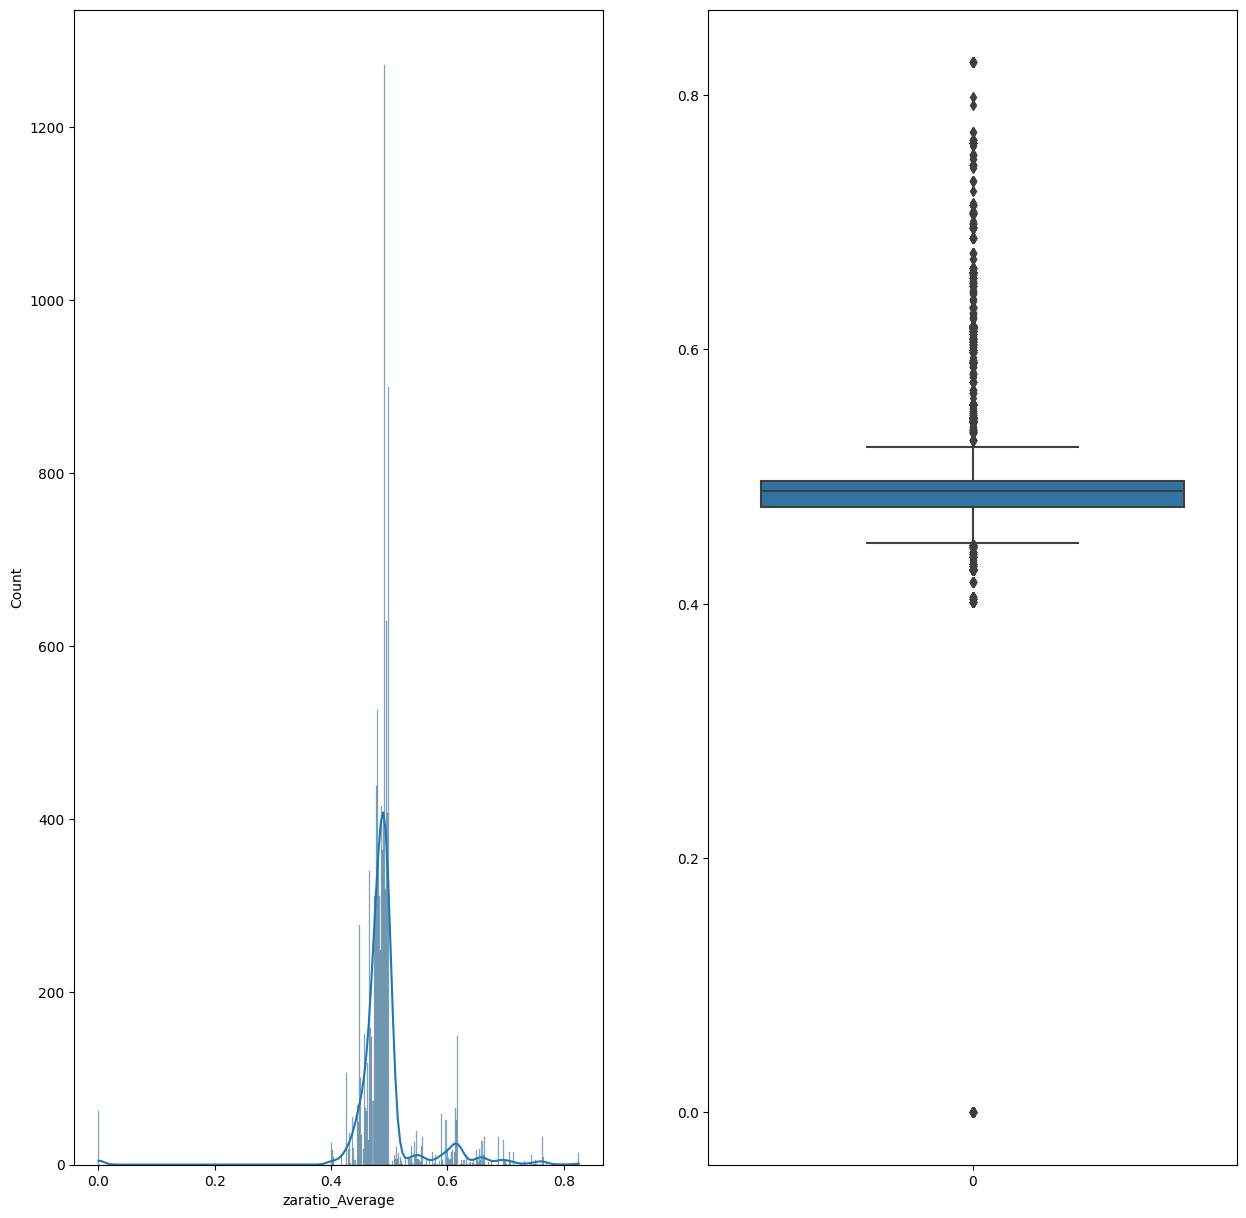

In [229]:
def plots(df):
    for i, col in enumerate(df):
        plt.figure(i)
        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15, 15))
        sns.histplot(df[col], kde=True,ax=ax1)
        sns.boxplot(df[col],ax=ax2)
plots(train[train.columns.difference(['Hardness'])])

In [230]:
train[train['allelectrons_Total']==train['allelectrons_Total'].max()]

id  allelectrons_Total  density_Total  allelectrons_Average  \
5493  5493             15300.0     643.093804              8.027397   

      val_e_Average  atomicweight_Average  ionenergy_Average  \
5493       5.401274             16.215127          12.976603   

      el_neg_chi_Average  R_vdw_element_Average  R_cov_element_Average  \
5493            3.179236               1.567945                0.73726   

      zaratio_Average  density_Average  Hardness  
5493          0.50503          0.58105       1.5

In [231]:
train.shape

(10407, 13)

In [232]:
test[test['allelectrons_Total']==test['allelectrons_Total'].max()]

id  allelectrons_Total  density_Total  allelectrons_Average  \
5860  16267             10116.0     502.575708              9.492063   
6772  17179             10116.0     502.575708              5.781132   

      val_e_Average  atomicweight_Average  ionenergy_Average  \
5860       4.825397             19.379077          11.213325   
6772       5.781132             19.379077          12.976603   

      el_neg_chi_Average  R_vdw_element_Average  R_cov_element_Average  \
5860            2.738565               1.752063               0.945714   
6772            3.184434               1.577104               0.731830   

      zaratio_Average  density_Average  
5860         0.496617          0.77420  
6772         0.497615          0.59237

In [233]:
train = train.drop(train['allelectrons_Total'].idxmax())
train = train.reset_index(drop=True)

In [234]:
train.corr()

id  allelectrons_Total  density_Total  \
id                     1.000000           -0.026289      -0.006736   
allelectrons_Total    -0.026289            1.000000       0.521714   
density_Total         -0.006736            0.521714       1.000000   
allelectrons_Average   0.001871            0.107379       0.389848   
val_e_Average         -0.003512            0.084988       0.085595   
atomicweight_Average   0.002043            0.112047       0.388825   
ionenergy_Average     -0.019507            0.034047      -0.119616   
el_neg_chi_Average    -0.015572            0.034485      -0.088883   
R_vdw_element_Average -0.003107            0.058920       0.222797   
R_cov_element_Average  0.003899            0.042642       0.265722   
zaratio_Average       -0.013691            0.039878      -0.098087   
density_Average        0.006344            0.084596       0.367543   
Hardness              -0.006973           -0.066188      -0.167429   

                       allelectrons_Average  val_e_Average  \
id                                 0.001871      -0.003512   
allelectrons_Total                 0.107379       0.084988   
density_Total                      0.389848       0.085595   
allelectrons_Average               1.000000       0.004479   
val_e_Average                      0.004479       1.000000   
atomicweight_Average               0.990660       0.001957   
ionenergy_Average                 -0.359976       0.453808   
el_neg_chi_Average                -0.319328       0.549921   
R_vdw_element_Average              0.550637       0.354677   
R_cov_element_Average              0.688653       0.189514   
zaratio_Average                   -0.328970       0.093839   
density_Average                    0.803628      -0.068810   
Hardness                          -0.400732       0.161977   

                       atomicweight_Average  ionenergy_Average  \
id                                 0.002043          -0.019507   
allelectrons_Total                 0.112047           0.034047   
density_Total                      0.388825          -0.119616   
allelectrons_Average               0.990660          -0.359976   
val_e_Average                      0.001957           0.453808   
atomicweight_Average               1.000000          -0.356574   
ionenergy_Average                 -0.356574           1.000000   
el_neg_chi_Average                -0.315974           0.773999   
R_vdw_element_Average              0.529246           0.078778   
R_cov_element_Average              0.666138          -0.235223   
zaratio_Average                   -0.327455           0.638655   
density_Average                    0.796551          -0.359671   
Hardness                          -0.403176           0.203518   

                       el_neg_chi_Average  R_vdw_element_Average  \
id                              -0.015572              -0.003107   
allelectrons_Total               0.034485               0.058920   
density_Total                   -0.088883               0.222797   
allelectrons_Average            -0.319328               0.550637   
val_e_Average                    0.549921               0.354677   
atomicweight_Average            -0.315974               0.529246   
ionenergy_Average                0.773999               0.078778   
el_neg_chi_Average               1.000000               0.122087   
R_vdw_element_Average            0.122087               1.000000   
R_cov_element_Average           -0.174332               0.811809   
zaratio_Average                  0.441227               0.002999   
density_Average                 -0.322023               0.439954   
Hardness                         0.290749              -0.061567   

                       R_cov_element_Average  zaratio_Average  \
id                                  0.003899        -0.013691   
allelectrons_Total                  0.042642         0.039878   
density_Total                       0.265722        -0.098087   
allelectrons_Average                0.688

In [235]:
for i in train.columns:
    for j in range(len(train.columns)):
        if train.corr()[i][j]>0.8 and train.corr()[i][j]!=1:
            print(i)
        else:
            continue


allelectrons_Average
allelectrons_Average
atomicweight_Average
R_vdw_element_Average
R_cov_element_Average
density_Average


In [236]:
train.corr()['allelectrons_Average'][5]>0.8

True

In [237]:
len(train.columns)

13

array([[<Axes: xlabel='id', ylabel='id'>,
        <Axes: xlabel='allelectrons_Total', ylabel='id'>,
        <Axes: xlabel='density_Total', ylabel='id'>,
        <Axes: xlabel='allelectrons_Average', ylabel='id'>,
        <Axes: xlabel='val_e_Average', ylabel='id'>,
        <Axes: xlabel='atomicweight_Average', ylabel='id'>,
        <Axes: xlabel='ionenergy_Average', ylabel='id'>,
        <Axes: xlabel='el_neg_chi_Average', ylabel='id'>,
        <Axes: xlabel='R_vdw_element_Average', ylabel='id'>,
        <Axes: xlabel='R_cov_element_Average', ylabel='id'>,
        <Axes: xlabel='zaratio_Average', ylabel='id'>,
        <Axes: xlabel='density_Average', ylabel='id'>,
        <Axes: xlabel='Hardness', ylabel='id'>],
       [<Axes: xlabel='id', ylabel='allelectrons_Total'>,
        <Axes: xlabel='allelectrons_Total', ylabel='allelectrons_Total'>,
        <Axes: xlabel='density_Total', ylabel='allelectrons_Total'>,
        <Axes: xlabel='allelectrons_Average', ylabel='allelectrons_Total'>,
 

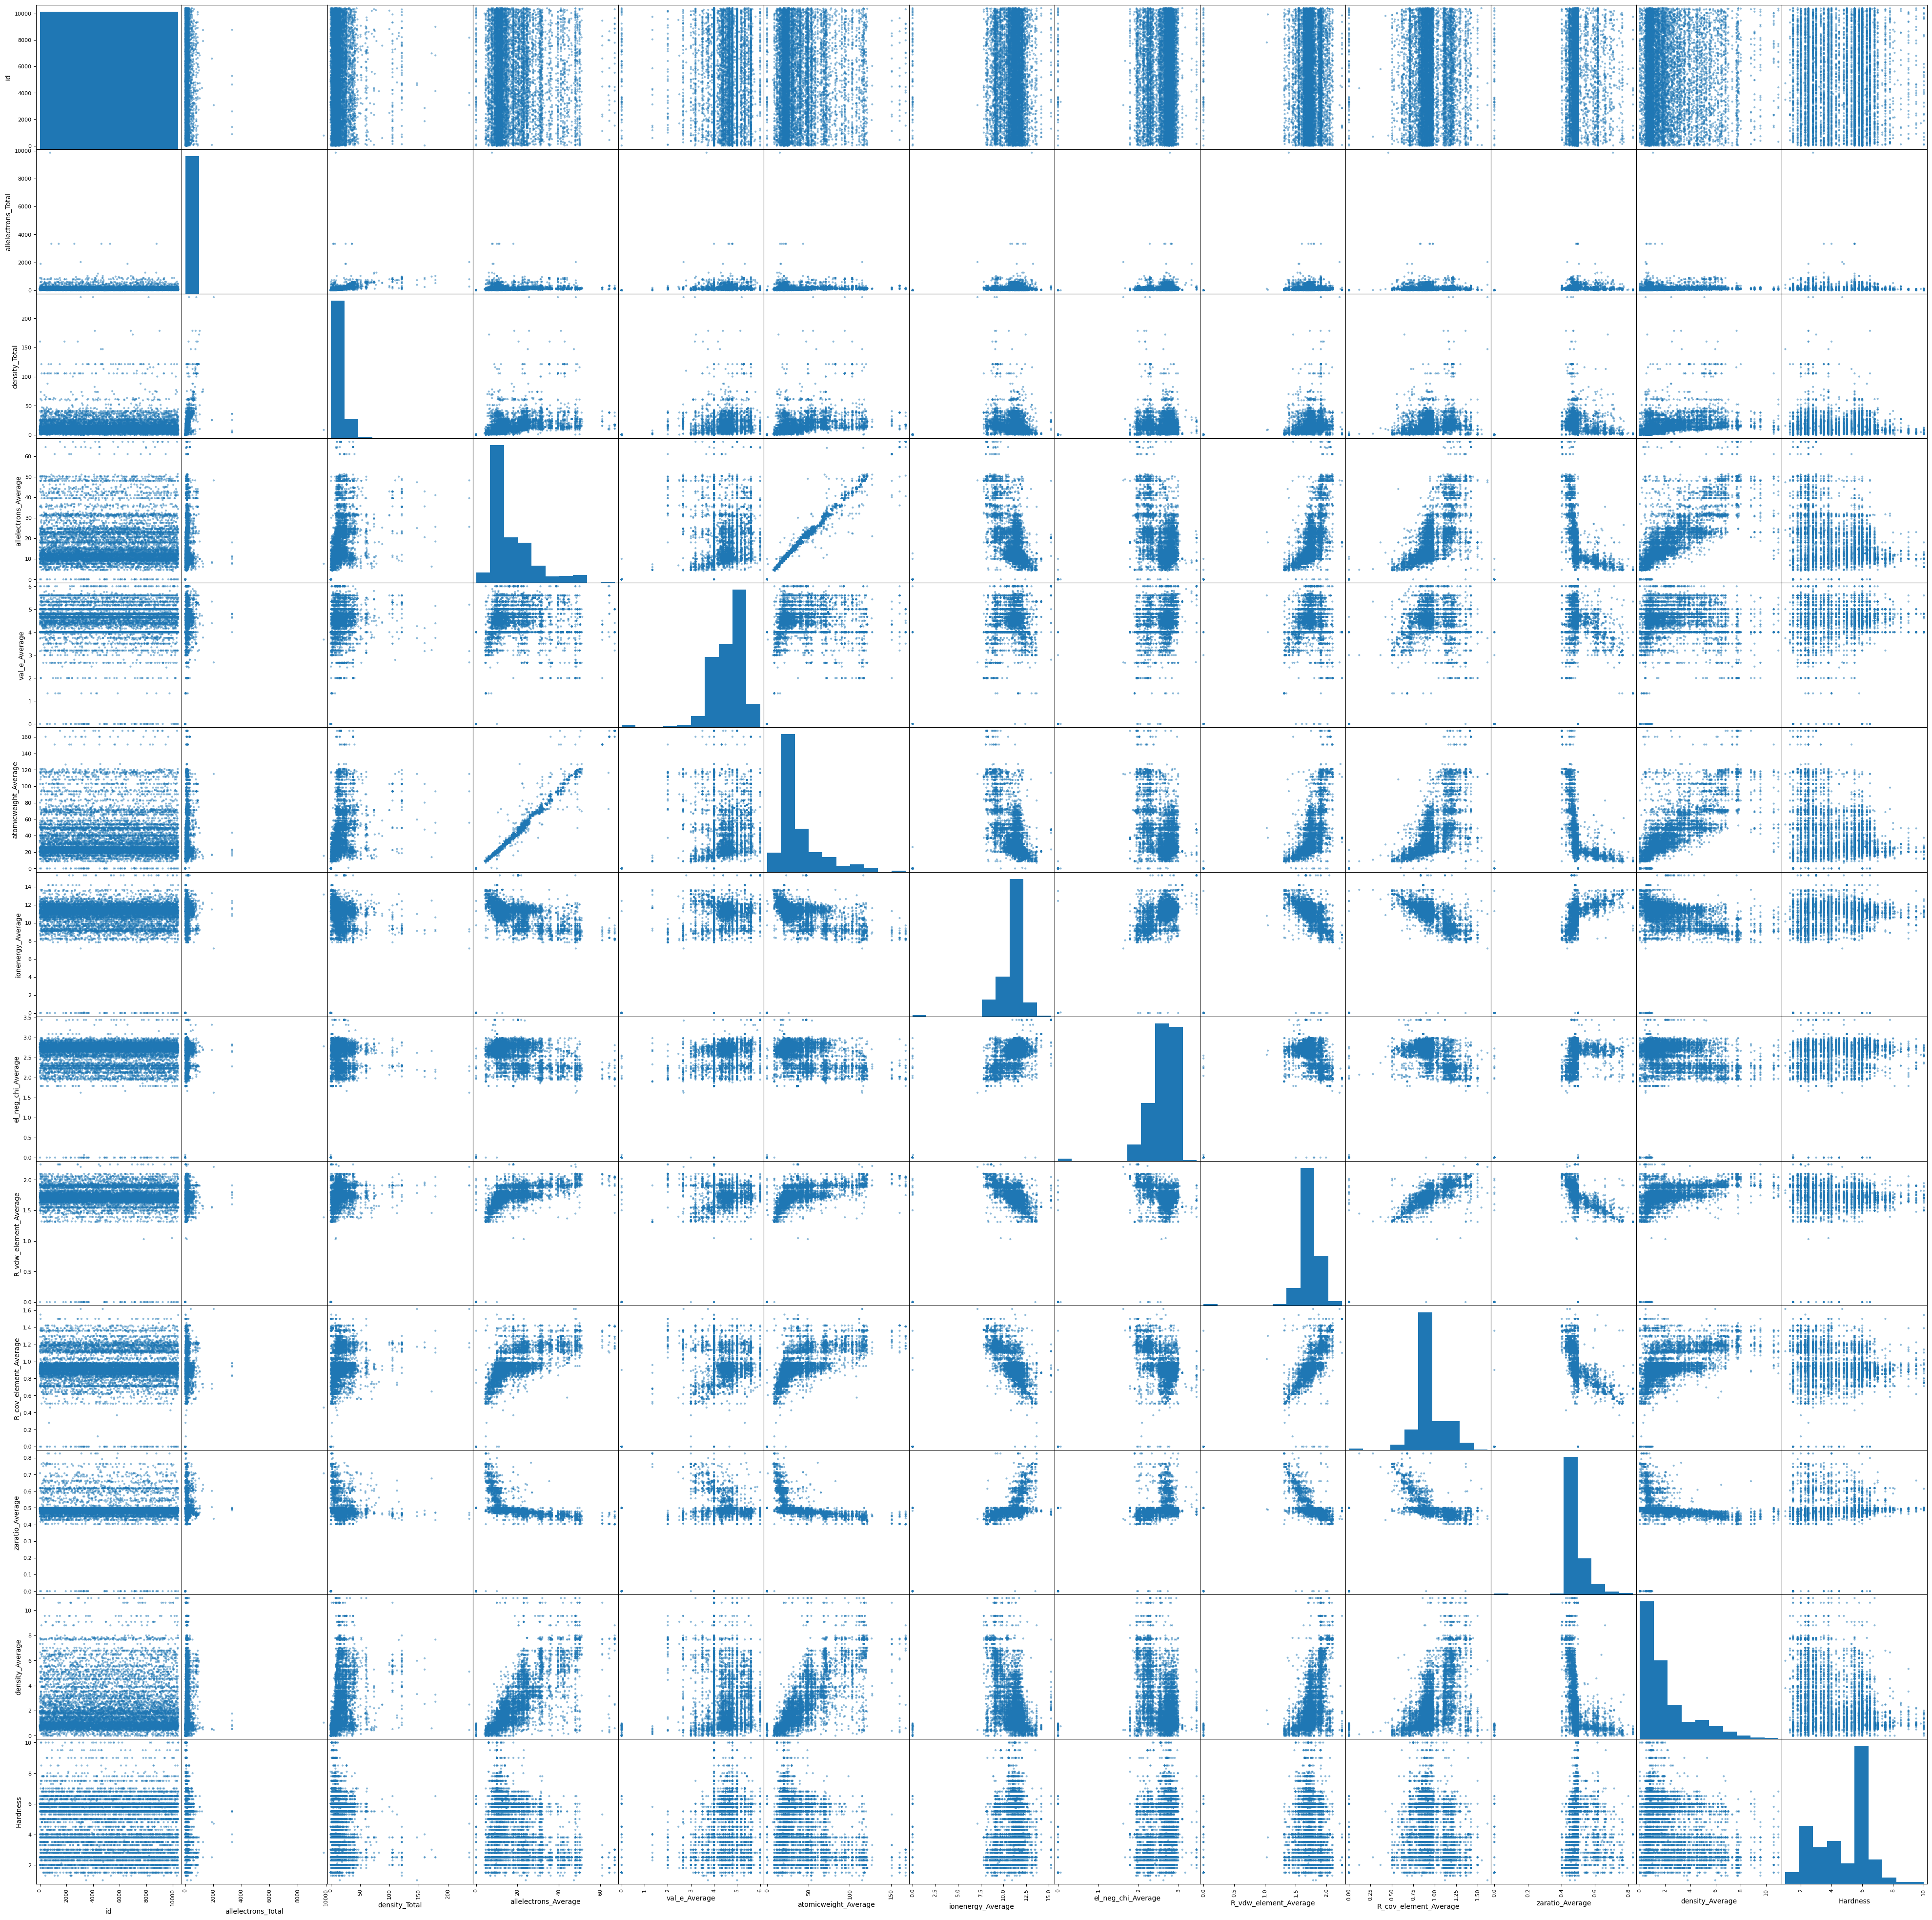

In [238]:
pd.plotting.scatter_matrix(train,figsize=(50,50))

In [239]:
mi_scores = mutual_info_regression(train[train.columns.difference(['Hardness'])], train['Hardness'])
mi_scores = pd.Series(mi_scores, name="Mutual Information", index=train.columns.difference(['Hardness']))

In [240]:
mi_scores

R_cov_element_Average    0.420401
R_vdw_element_Average    0.399847
allelectrons_Average     0.397664
allelectrons_Total       0.282409
atomicweight_Average     0.495816
density_Average          0.206601
density_Total            0.333735
el_neg_chi_Average       0.409927
id                       0.000000
ionenergy_Average        0.455717
val_e_Average            0.306376
zaratio_Average          0.491135
Name: Mutual Information, dtype: float64

In [241]:
mineral.drop(columns='Unnamed: 0', inplace=True)
mineral['source'] = 'mineral'
train['source'] = 'train'

train = pd.concat([mineral, train])
train = train.reset_index(drop=True)

In [242]:
crystals.drop(columns='Unnamed: 0', inplace=True)
mineral['source'] = 'mineral_original'
train['source'] = 'train'

In [243]:
crystals.head()

Formula Crystal structure  Hardness (Mohs)  allelectrons_Total  \
0        MnTeMoO6        tetragonal              4.5               167.0   
1            MgH2        tetragonal              4.0                14.0   
2  CO(NH2)2C4H6O5        monoclinic              2.5               102.0   
3           GaPO4          trigonal              5.5                78.0   
4          Ga3PO7          trigonal              6.5               164.0   

   density_Total  allelectrons_Average  val_e_Average  atomicweight_Average  \
0      23.907992             18.555556       5.000000             41.609136   
1       1.740168              4.666667       1.333333              8.773227   
2       8.511159              4.434783       3.304348              8.440584   
3       8.109328             13.000000       5.333333             27.448814   
4      19.921324             14.909091       5.090909             32.012361   

   ionenergy_Average  el_neg_chi_Average  R_vdw_element_Average  \
0          11.693844            2.938889               1.711111   
1          11.614333            1.903333               1.310000   
2          13.176622            2.672609               1.379130   
3          11.826400            2.960000               1.625000   
4          11.255573            2.881818               1.640909   

   R_cov_element_Average  zaratio_Average  density_Average  
0               0.884444         0.477830         2.656444  
1               0.680000         0.825990         0.580056  
2               0.530870         0.713850         0.370050  
3               0.813333         0.488163         1.351555  
4               0.841818         0.483480         1.811029

In [244]:
null_func(crystals)

Missing values
Formula                  0
Crystal structure        1
Hardness (Mohs)          0
allelectrons_Total       0
density_Total            0
allelectrons_Average     0
val_e_Average            0
atomicweight_Average     0
ionenergy_Average        0
el_neg_chi_Average       0
R_vdw_element_Average    0
R_cov_element_Average    0
zaratio_Average          0
density_Average          0
dtype: int64


In [245]:
crystals['Crystal structure']=crystals['Crystal structure'].fillna('Unknown')
crystals.drop('Formula',axis=1,inplace=True)

In [246]:
crystals.shape

(52, 13)

In [247]:
train.head()

Hardness  allelectrons_Total  density_Total  allelectrons_Average  \
0       2.3               110.0      23.000000             36.666667   
1       5.5               406.0      30.472136              9.902439   
2       5.5               406.0      30.472464             10.410256   
3       5.5               476.0      61.142136             11.609756   
4       5.5               476.0      61.142464             12.205128   

   val_e_Average  atomicweight_Average  ionenergy_Average  el_neg_chi_Average  \
0       2.666667             82.598467           8.504133            2.146667   
1       4.682927             19.813180          11.456151            2.700244   
2       4.923077             20.931371          11.541405            2.753590   
3       4.682927             23.659644          11.487395            2.763659   
4       4.923077             24.975089          11.574251            2.820256   

   R_vdw_element_Average  R_cov_element_Average  zaratio_Average  \
0               2.006667               1.253333         0.456803   
1               1.676829               0.868293         0.522909   
2               1.703846               0.894359         0.497498   
3               1.714634               0.848780         0.519474   
4               1.743590               0.873846         0.493887   

   density_Average source  id  
0         7.666667  train NaN  
1         0.743223  train NaN  
2         0.781345  train NaN  
3         1.491272  train NaN  
4         1.567755  train NaN

In [248]:
crystals.rename(columns={'Hardness (Mohs)':'Hardness'},inplace=True)

In [249]:
train.head()

Hardness  allelectrons_Total  density_Total  allelectrons_Average  \
0       2.3               110.0      23.000000             36.666667   
1       5.5               406.0      30.472136              9.902439   
2       5.5               406.0      30.472464             10.410256   
3       5.5               476.0      61.142136             11.609756   
4       5.5               476.0      61.142464             12.205128   

   val_e_Average  atomicweight_Average  ionenergy_Average  el_neg_chi_Average  \
0       2.666667             82.598467           8.504133            2.146667   
1       4.682927             19.813180          11.456151            2.700244   
2       4.923077             20.931371          11.541405            2.753590   
3       4.682927             23.659644          11.487395            2.763659   
4       4.923077             24.975089          11.574251            2.820256   

   R_vdw_element_Average  R_cov_element_Average  zaratio_Average  \
0               2.006667               1.253333         0.456803   
1               1.676829               0.868293         0.522909   
2               1.703846               0.894359         0.497498   
3               1.714634               0.848780         0.519474   
4               1.743590               0.873846         0.493887   

   density_Average source  id  
0         7.666667  train NaN  
1         0.743223  train NaN  
2         0.781345  train NaN  
3         1.491272  train NaN  
4         1.567755  train NaN

In [250]:
#scaler = StandardScaler()
#scaler.fit(train[train.columns.difference(['Hardness'])])

In [251]:
#train_new = scaler.transform(train[train.columns.difference(['Hardness'])])

In [252]:
#train_new = pd.DataFrame(train_new, columns = train.columns.difference(['Hardness']))

In [253]:
#train_new.head()

In [254]:
train.head()

Hardness  allelectrons_Total  density_Total  allelectrons_Average  \
0       2.3               110.0      23.000000             36.666667   
1       5.5               406.0      30.472136              9.902439   
2       5.5               406.0      30.472464             10.410256   
3       5.5               476.0      61.142136             11.609756   
4       5.5               476.0      61.142464             12.205128   

   val_e_Average  atomicweight_Average  ionenergy_Average  el_neg_chi_Average  \
0       2.666667             82.598467           8.504133            2.146667   
1       4.682927             19.813180          11.456151            2.700244   
2       4.923077             20.931371          11.541405            2.753590   
3       4.682927             23.659644          11.487395            2.763659   
4       4.923077             24.975089          11.574251            2.820256   

   R_vdw_element_Average  R_cov_element_Average  zaratio_Average  \
0               2.006667               1.253333         0.456803   
1               1.676829               0.868293         0.522909   
2               1.703846               0.894359         0.497498   
3               1.714634               0.848780         0.519474   
4               1.743590               0.873846         0.493887   

   density_Average source  id  
0         7.666667  train NaN  
1         0.743223  train NaN  
2         0.781345  train NaN  
3         1.491272  train NaN  
4         1.567755  train NaN

In [255]:
common=[]
for i in crystals.columns:
    if i in train:
        common.append(i)
common

['Hardness',
 'allelectrons_Total',
 'density_Total',
 'allelectrons_Average',
 'val_e_Average',
 'atomicweight_Average',
 'ionenergy_Average',
 'el_neg_chi_Average',
 'R_vdw_element_Average',
 'R_cov_element_Average',
 'zaratio_Average',
 'density_Average']

In [256]:
crystals.columns

Index(['Crystal structure', 'Hardness', 'allelectrons_Total', 'density_Total',
       'allelectrons_Average', 'val_e_Average', 'atomicweight_Average',
       'ionenergy_Average', 'el_neg_chi_Average', 'R_vdw_element_Average',
       'R_cov_element_Average', 'zaratio_Average', 'density_Average'],
      dtype='object')

In [257]:
train.head()

Hardness  allelectrons_Total  density_Total  allelectrons_Average  \
0       2.3               110.0      23.000000             36.666667   
1       5.5               406.0      30.472136              9.902439   
2       5.5               406.0      30.472464             10.410256   
3       5.5               476.0      61.142136             11.609756   
4       5.5               476.0      61.142464             12.205128   

   val_e_Average  atomicweight_Average  ionenergy_Average  el_neg_chi_Average  \
0       2.666667             82.598467           8.504133            2.146667   
1       4.682927             19.813180          11.456151            2.700244   
2       4.923077             20.931371          11.541405            2.753590   
3       4.682927             23.659644          11.487395            2.763659   
4       4.923077             24.975089          11.574251            2.820256   

   R_vdw_element_Average  R_cov_element_Average  zaratio_Average  \
0               2.006667               1.253333         0.456803   
1               1.676829               0.868293         0.522909   
2               1.703846               0.894359         0.497498   
3               1.714634               0.848780         0.519474   
4               1.743590               0.873846         0.493887   

   density_Average source  id  
0         7.666667  train NaN  
1         0.743223  train NaN  
2         0.781345  train NaN  
3         1.491272  train NaN  
4         1.567755  train NaN

In [258]:
from sklearn.neighbors import NearestNeighbors
x_og=crystals[common]
x_train=train[common]

In [259]:
nn = NearestNeighbors(n_neighbors=1, p=2)
nn.fit(x_og)

NearestNeighbors(n_neighbors=1)

In [260]:
distances_df, indices_df = nn.kneighbors(x_train)

In [261]:
train['Crystal structure'] = crystals.iloc[indices_df.flatten()]['Crystal structure'].values

In [262]:
common_test=[]
for i in crystals.columns:
    if i in test:
        common_test.append(i)
common_test

['allelectrons_Total',
 'density_Total',
 'allelectrons_Average',
 'val_e_Average',
 'atomicweight_Average',
 'ionenergy_Average',
 'el_neg_chi_Average',
 'R_vdw_element_Average',
 'R_cov_element_Average',
 'zaratio_Average',
 'density_Average']

In [263]:
x_og=crystals[common_test]
x_test=test[common_test]
nn.fit(x_og)
distances_test, indices_test = nn.kneighbors(x_test)
test['Crystal structure'] = crystals.iloc[indices_test.flatten()]['Crystal structure'].values

In [264]:
train.head()

Hardness  allelectrons_Total  density_Total  allelectrons_Average  \
0       2.3               110.0      23.000000             36.666667   
1       5.5               406.0      30.472136              9.902439   
2       5.5               406.0      30.472464             10.410256   
3       5.5               476.0      61.142136             11.609756   
4       5.5               476.0      61.142464             12.205128   

   val_e_Average  atomicweight_Average  ionenergy_Average  el_neg_chi_Average  \
0       2.666667             82.598467           8.504133            2.146667   
1       4.682927             19.813180          11.456151            2.700244   
2       4.923077             20.931371          11.541405            2.753590   
3       4.682927             23.659644          11.487395            2.763659   
4       4.923077             24.975089          11.574251            2.820256   

   R_vdw_element_Average  R_cov_element_Average  zaratio_Average  \
0               2.006667               1.253333         0.456803   
1               1.676829               0.868293         0.522909   
2               1.703846               0.894359         0.497498   
3               1.714634               0.848780         0.519474   
4               1.743590               0.873846         0.493887   

   density_Average source  id Crystal structure  
0         7.666667  train NaN        monoclinic  
1         0.743223  train NaN         hexagonal  
2         0.781345  train NaN         hexagonal  
3         1.491272  train NaN         hexagonal  
4         1.567755  train NaN         hexagonal

In [265]:
train.drop_duplicates(train.columns.difference(['Hardness','Source']),keep='first',inplace=True)

In [266]:
train.drop(columns='allelectrons_Total', inplace=True)
test.drop(columns='allelectrons_Total', inplace=True)

train.drop(columns='R_vdw_element_Average', inplace=True)
test.drop(columns='R_vdw_element_Average', inplace=True)

train.drop(columns='density_Average', inplace=True)
test.drop(columns='density_Average', inplace=True)

train.drop(columns='id', inplace=True)
test.drop(columns='id', inplace=True)

In [267]:
target = 'Hardness'
X = train.drop(columns=[target, 'source'])
y = train[target].values
feature_names = X.columns.tolist()

In [268]:
X_train, X_test, y_train, y_test = train_test_split(X,y ,test_size = 0.2, random_state=5)

In [269]:
X_train

density_Total  allelectrons_Average  val_e_Average  \
1972      25.494000             42.800000       5.600000   
3760       7.767992             12.800000       4.800000   
8254       8.903332             23.000000       4.000000   
6980      13.955818              7.920000       4.160000   
2867       4.075328             10.833333       4.666667   
...             ...                   ...            ...   
3104       5.896328             11.142857       4.571429   
9975      13.387328             24.666667       4.666667   
4137      47.231992             21.000000       4.800000   
2312       4.542664              9.666667       4.666667   
2973       4.542664             12.666667       4.666667   

      atomicweight_Average  ionenergy_Average  el_neg_chi_Average  \
1972            102.827560           9.130200            2.308000   
3760             26.203827          11.026725            2.810000   
8254             49.496000          10.074300            2.115000   
6980             15.693100          12.046624            2.713600   
2867             21.654418          11.393583            2.848000   
...                    ...                ...                 ...   
3104             22.594280          10.421514            2.584286   
9975             54.019637           9.159867            2.146667   
4137             49.204038          10.789170            2.884000   
2312             19.689448          11.408267            2.826667   
2973             26.621687          11.354767            2.806667   

      R_cov_element_Average  zaratio_Average Crystal structure  
1972               1.224000         0.458250        monoclinic  
3760               0.960000         0.491224        monoclinic  
8254               1.120000         0.478990       rhomohedral  
6980               0.715200         0.616443        monoclinic  
2867               0.900000         0.487833        monoclinic  
...                     ...              ...               ...  
3104               0.914286         0.486791      orthorhombic  
9975               1.106667         0.474727       rhomohedral  
4137               0.946000         0.475954        monoclinic  
2312               0.815000         0.482157        monoclinic  
2973               0.920000         0.486507        monoclinic  

[8776 rows x 9 columns]

In [270]:
train_dataset = cb.Pool(X_train, y_train,cat_features=['Crystal structure'])
test_dataset = cb.Pool(X_test, y_test,cat_features=['Crystal structure'])

In [271]:
model = cb.CatBoostRegressor(loss_function='RMSE')

In [272]:
model.fit(train_dataset, eval_set=test_dataset, early_stopping_rounds=250)

Learning rate set to 0.071613
0:	learn: 1.6407570	test: 1.6506770	best: 1.6506770 (0)	total: 7.11ms	remaining: 7.1s
1:	learn: 1.6056707	test: 1.6154786	best: 1.6154786 (1)	total: 14ms	remaining: 6.98s
2:	learn: 1.5740864	test: 1.5837836	best: 1.5837836 (2)	total: 21ms	remaining: 6.98s
3:	learn: 1.5453351	test: 1.5552799	best: 1.5552799 (3)	total: 27.7ms	remaining: 6.9s
4:	learn: 1.5188622	test: 1.5281300	best: 1.5281300 (4)	total: 34.4ms	remaining: 6.85s
5:	learn: 1.4960658	test: 1.5048865	best: 1.5048865 (5)	total: 41.1ms	remaining: 6.8s
6:	learn: 1.4753160	test: 1.4834809	best: 1.4834809 (6)	total: 47.7ms	remaining: 6.77s
7:	learn: 1.4562034	test: 1.4652098	best: 1.4652098 (7)	total: 54.2ms	remaining: 6.72s
8:	learn: 1.4390808	test: 1.4471899	best: 1.4471899 (8)	total: 60.8ms	remaining: 6.7s
9:	learn: 1.4231561	test: 1.4306934	best: 1.4306934 (9)	total: 70.4ms	remaining: 6.97s
10:	learn: 1.4092966	test: 1.4167310	best: 1.4167310 (10)	total: 76.5ms	remaining: 6.87s
11:	learn: 1.396460

In [273]:
model.eval_metrics(test_dataset, ['MedianAbsoluteError'])


{'MedianAbsoluteError': [1.2850890980812029,
  1.223174654653448,
  1.176079288267534,
  1.1736133234555393,
  1.152419924595954,
  1.1550300772169484,
  1.1391559927091008,
  1.1361923802393838,
  1.1398694968523313,
  1.128892555465216,
  1.1063413985361303,
  1.090998125358435,
  1.0632772169789566,
  1.038936576895229,
  1.0108242880896796,
  0.9910764859192291,
  0.9771667736956464,
  0.9577748124230077,
  0.9483846407198286,
  0.9310336110609545,
  0.9140252623415781,
  0.9040088220581022,
  0.8842160006475028,
  0.8655099758164864,
  0.8547045906698629,
  0.8457305739582592,
  0.8411175365098571,
  0.8348640590904735,
  0.824508685891097,
  0.8158701875651637,
  0.81339285770785,
  0.8033387030453476,
  0.7963258615780697,
  0.7854642117143138,
  0.7821759923156082,
  0.7822093836928157,
  0.7800012775342897,
  0.7717157737152389,
  0.7749129616250596,
  0.7682850297155299,
  0.7677849920520452,
  0.760697341805294,
  0.7591217737949068,
  0.750964376103346,
  0.7506865111193646

In [274]:
pred = model.predict(X_test)

In [275]:
rmse = (mean_squared_error(y_test, pred))

In [276]:
rmse

1.4140051238345472

In [277]:
r2 = r2_score(y_test, pred)

In [278]:
r2

0.5048017467274268

In [279]:
sorted_feature_importance = model.feature_importances_.argsort()

Text(0.5, 0, 'CatBoost Feature Importance')

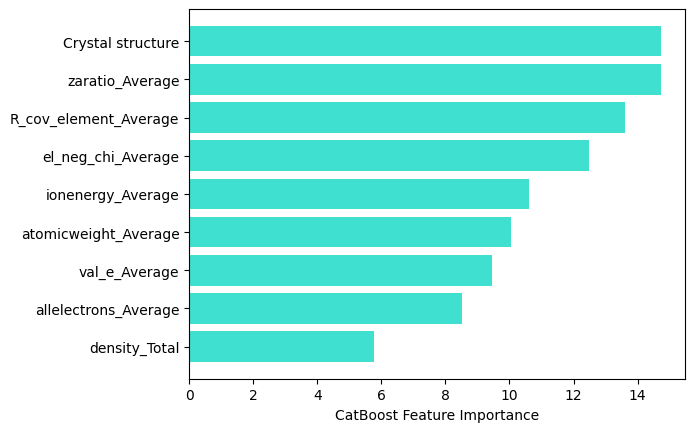

In [280]:
sorted_feature_importance
plt.barh(X_train.columns,
        model.feature_importances_[sorted_feature_importance],
        color='turquoise')
plt.xlabel("CatBoost Feature Importance")

In [98]:
model

In [ ]:
uname = "anvayg412"
!git config --global user.email '$uname@gmail.com'
!git config --global user.name '$uname'

from getpass import getpass
password = getpass('Anvayplg412.')
!git clone https://github.com/anvayg412/Prediction-of-Mohs-Hardness.git
